# **Лекция: Session-Based рекомендательные системы**





## **ЭВОЛЮЦИЯ РЕКОМЕНДАТЕЛЬНЫХ СИСТЕМ**


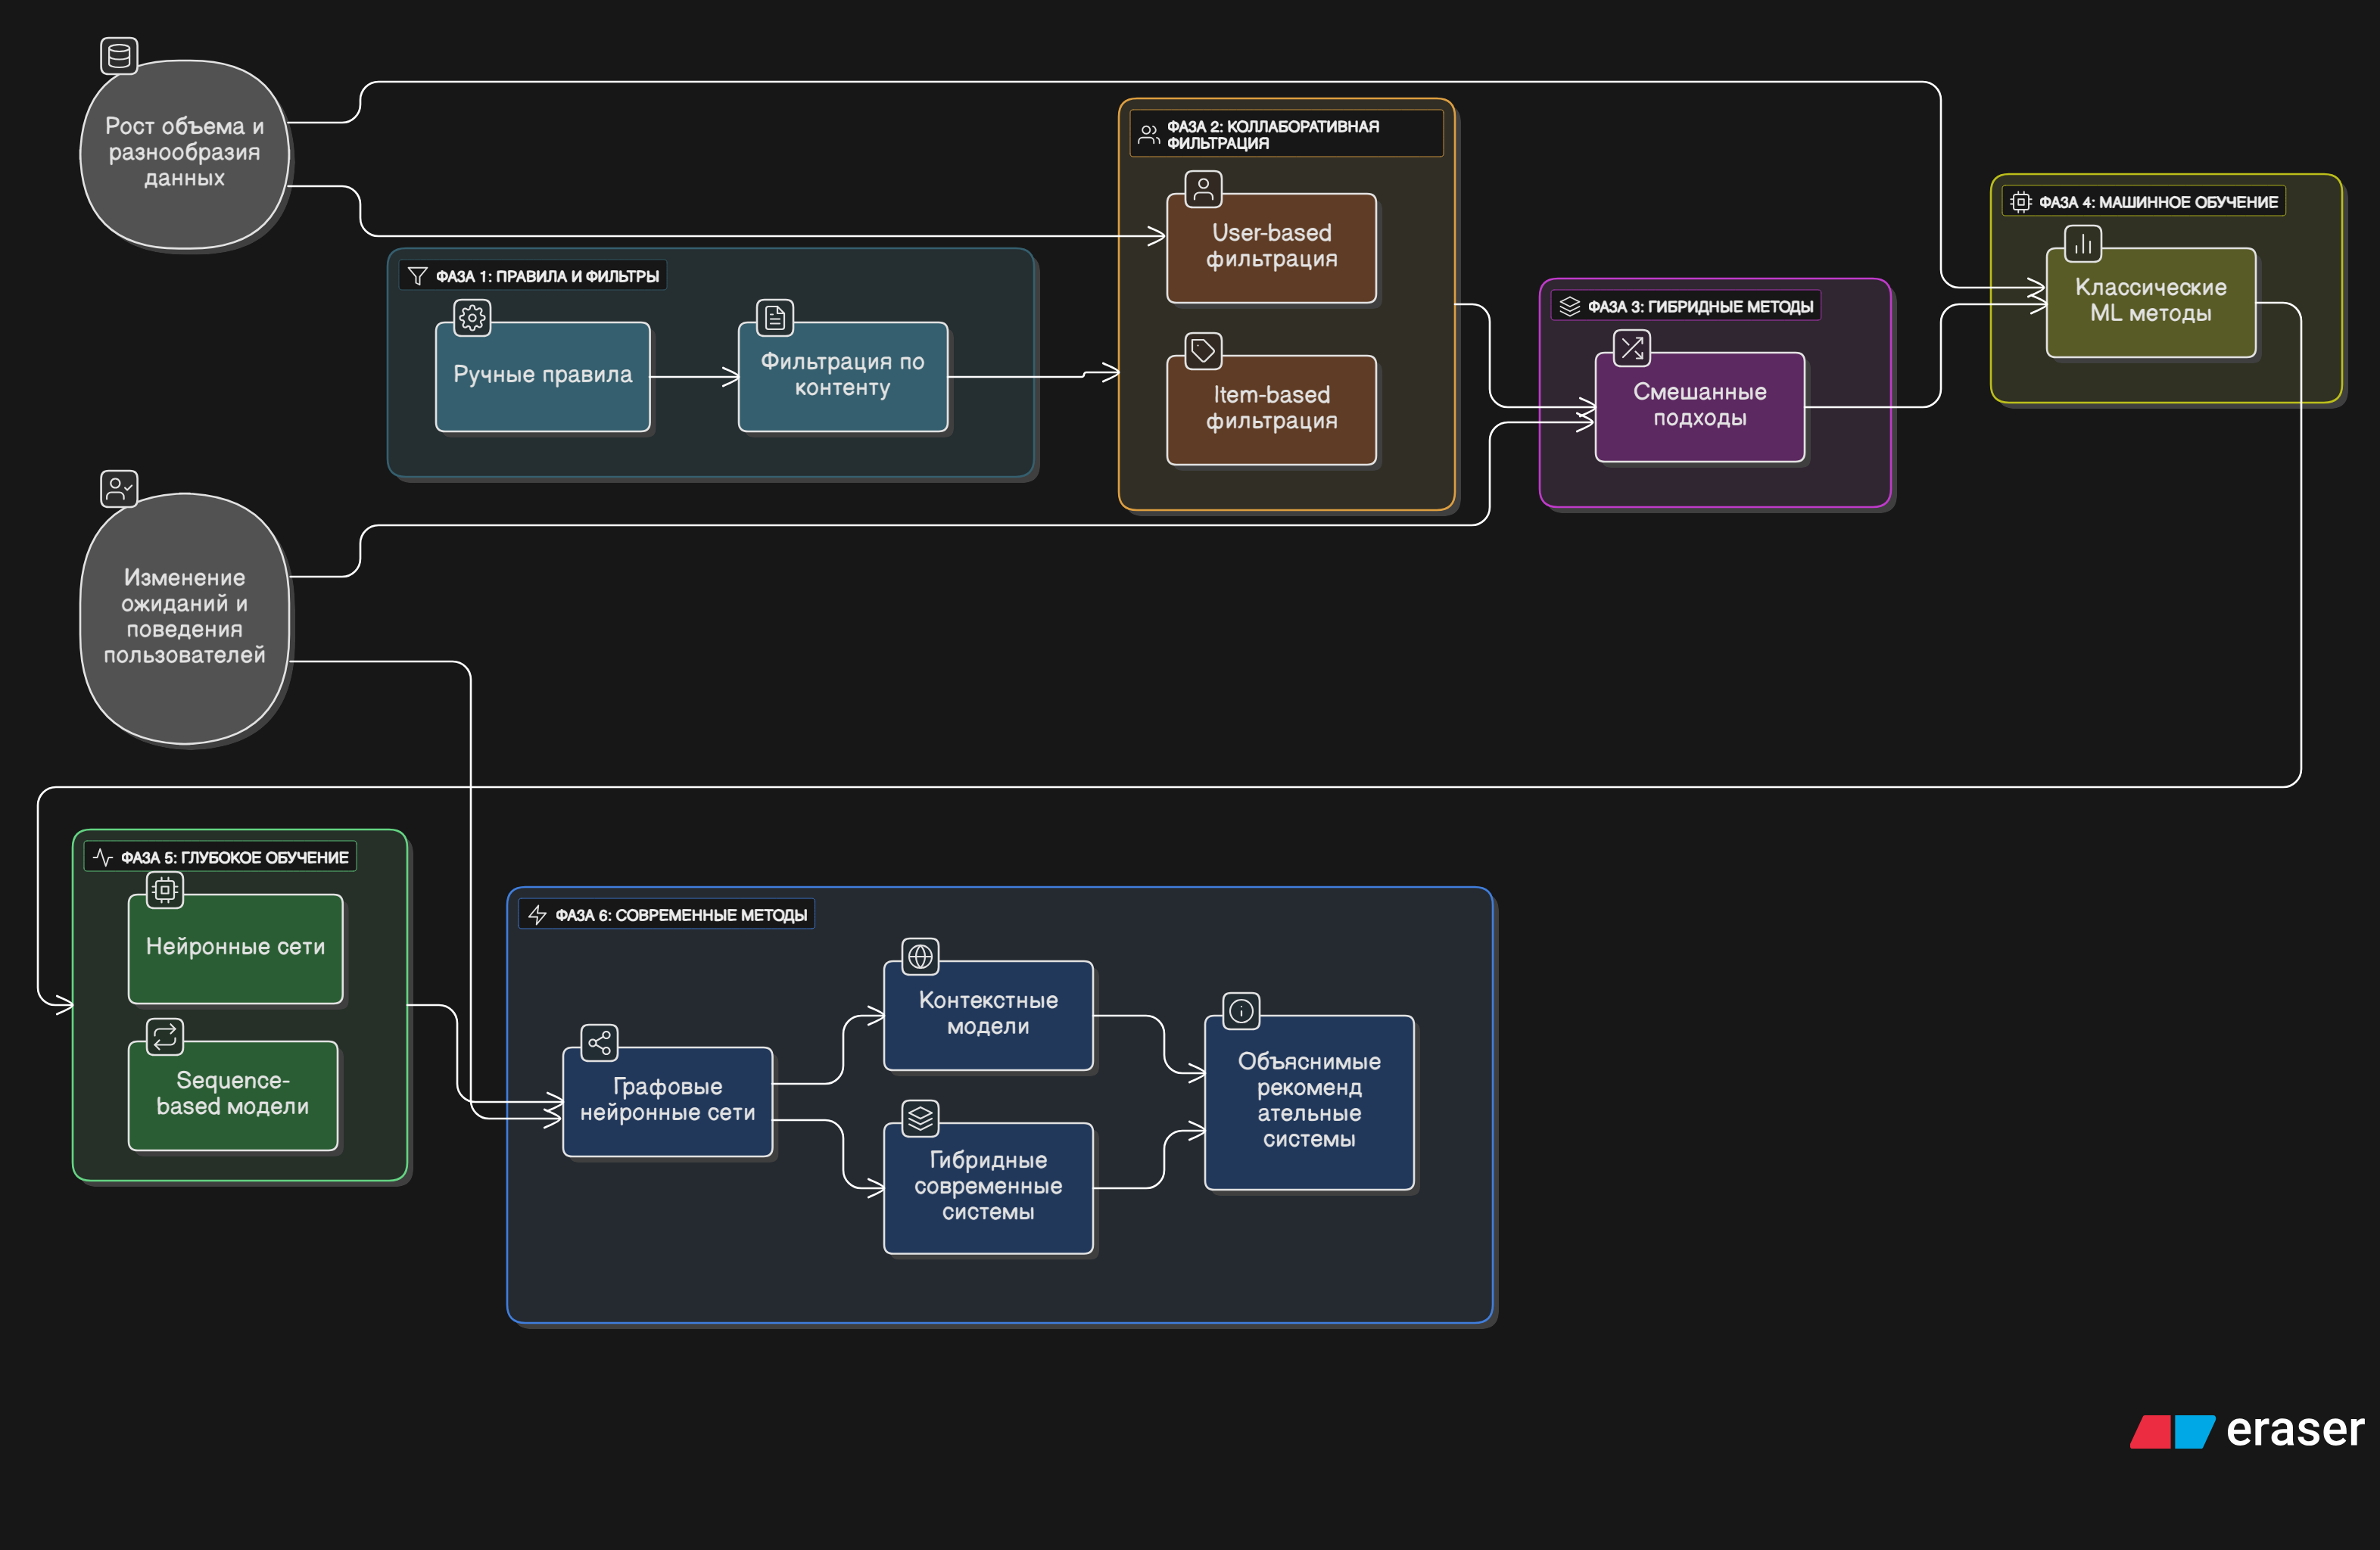

## ОСНОВНЫЕ ПРОБЛЕМЫ РЕКОМЕНДАТЕЛЬНЫХ СИСТЕМ

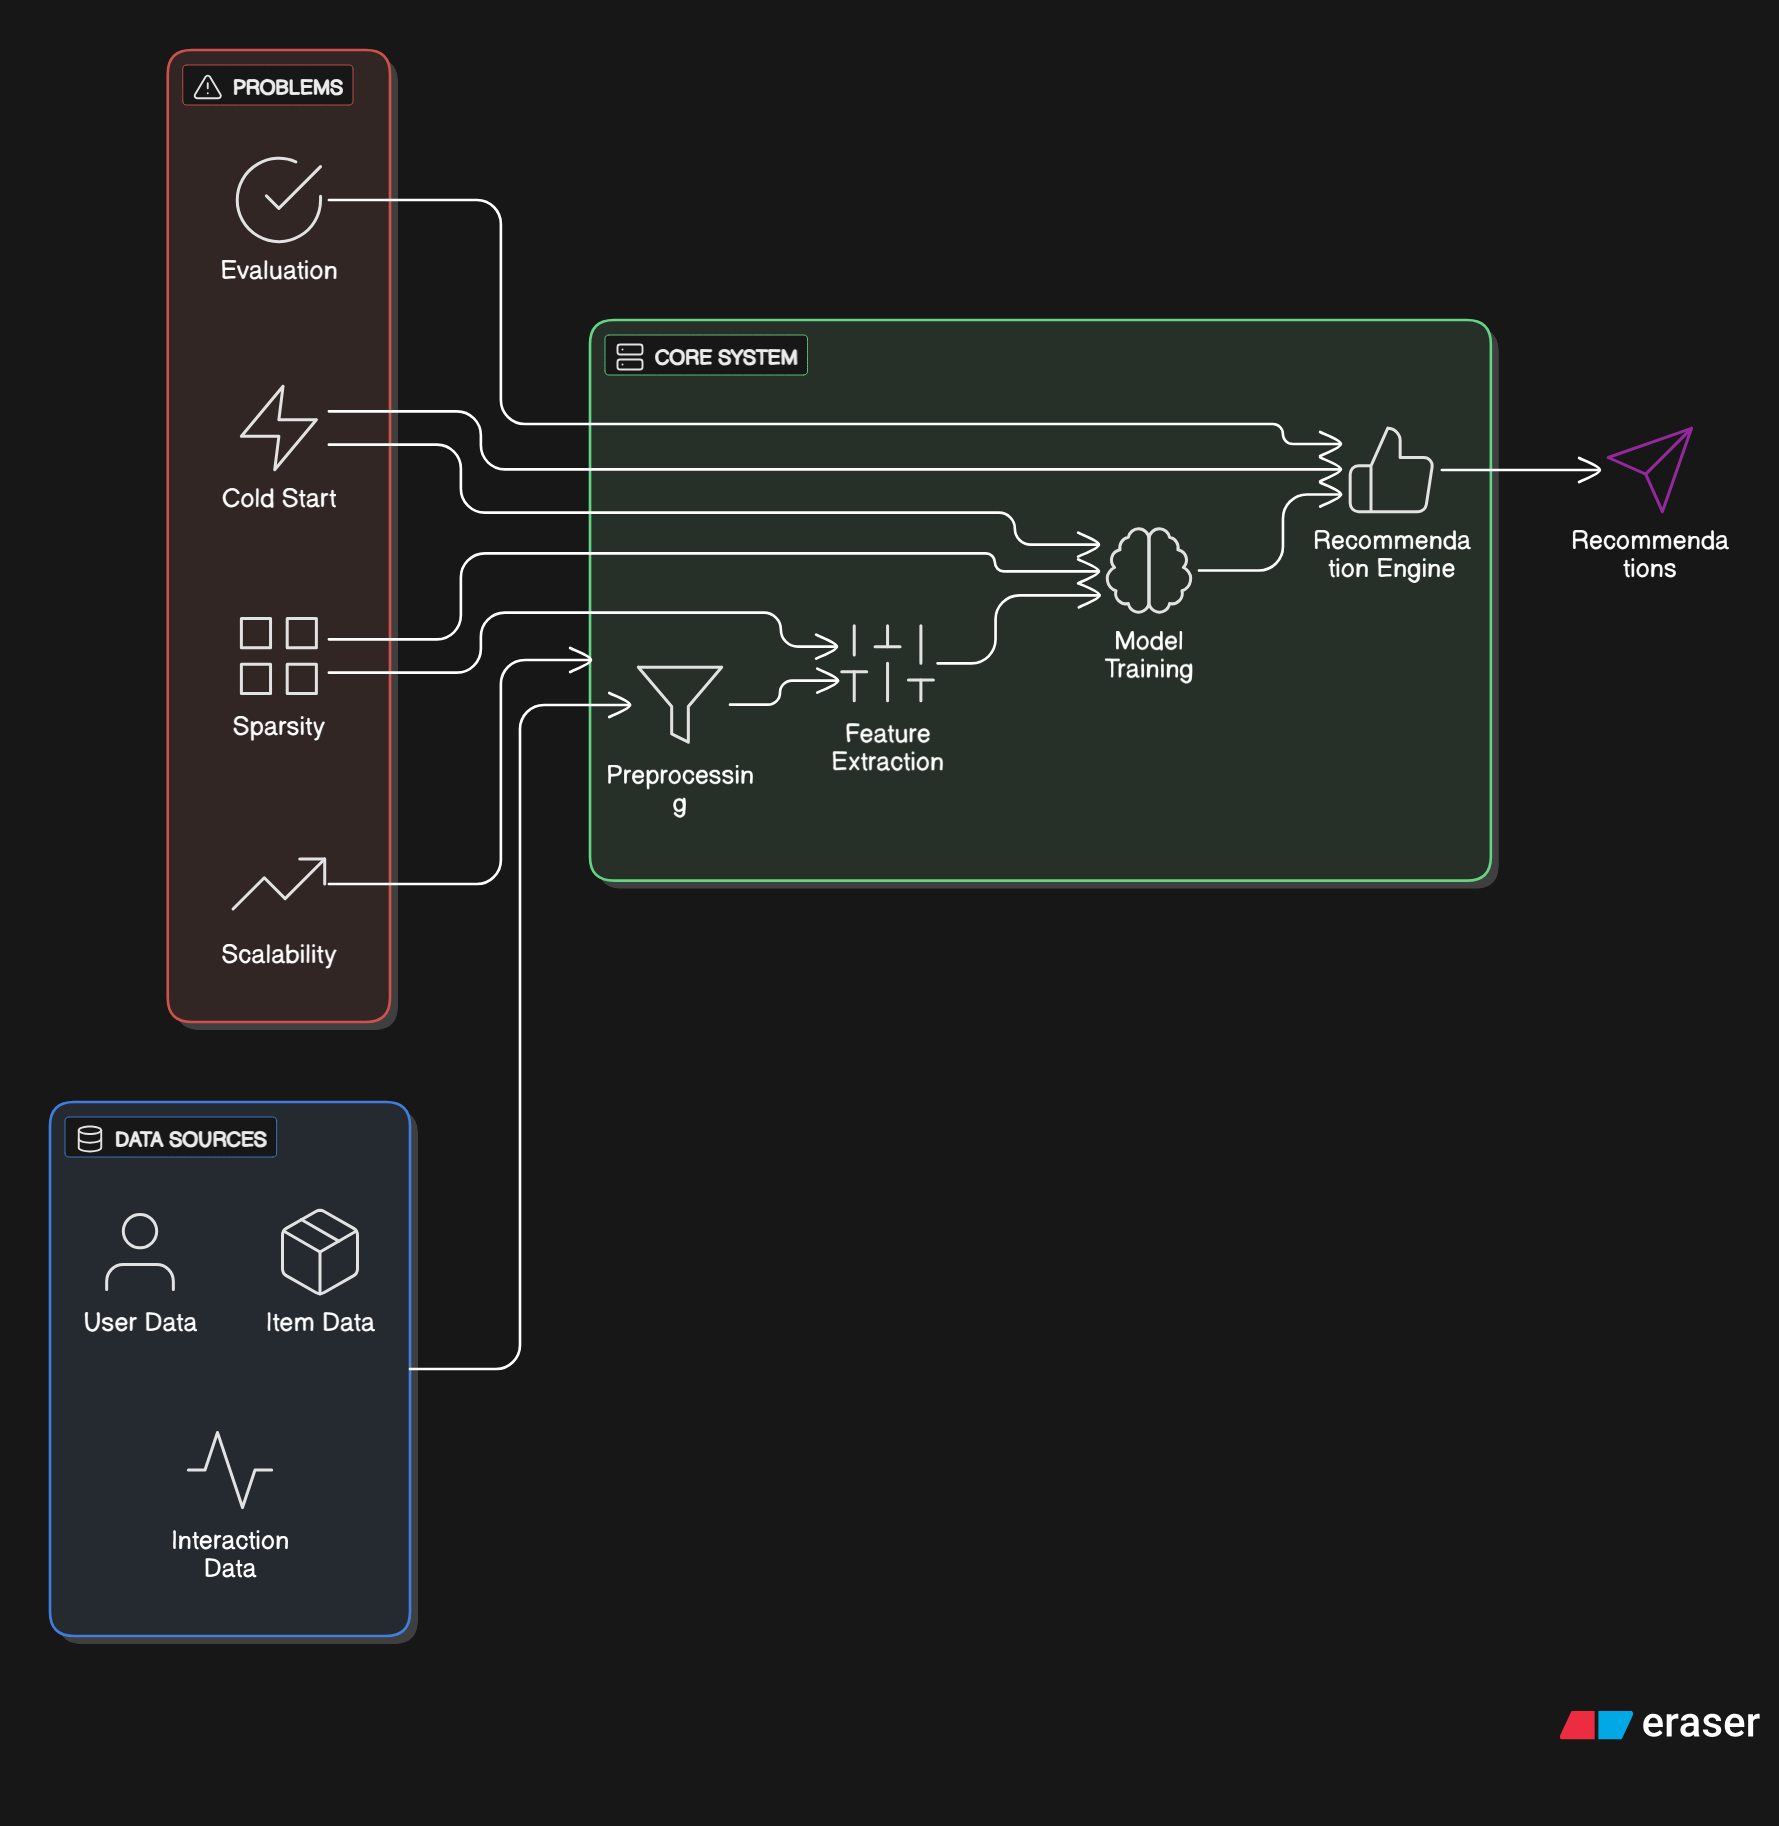



# Почему рекомендации — это задача предсказания последовательности?


## Как меняется понимание пользователя

### **Традиционный взгляд: статичная модель**
- **Пользователь = фиксированный набор предпочтений.**
    - Пример: _«Пользователю A нравятся {телефоны, наушники, книги}»_
    - Рекомендации по похожим товарам и категориям.
- **Недостаток**\
    Игнорируется изменение интересов в реальном времени и текущий контекст.

---

### **Современный взгляд: динамическая (сессионная) модель**
- **Пользователь = поток текущих действий.**
    - Пример: _анализ последних кликов или поиска._
    - Рекомендация: предсказать следующий шаг в текущей цепочке интересов.
- **Преимущество**\
    Лучше отражает контекст и истинный пользовательский интент прямо сейчас.

---

## Почему последовательность важнее «наборов»

- **Интересы меняются на лету:** в течение одной сессии пользователь может перескакивать между темами.
- **Контекст критичен:** утром пользователь ищет одно, вечером — другое.
- **Порядок действий раскрывает цель**
    - Важно не только, что пользователь интересовался кофе и ноутбуками, но и то, в какой последовательности и когда это произошло.

---

### **Математическая суть**

- **Старый подход:**  
    `P(нравится товар X | пользователь U)`  
    — базируется на общей истории, игнорирует текущий интерес.

- **Современный подход:**  
    `P(следующий товар = X | последовательность последних действий)`  
    — учитывает именно сессию и свежий контекст.

---

## **3. Практические плюсы сессионного подхода**

- **Решение холодного старта**\
    Достаточно текущих действий, не нужна долгая история.
- **Адаптация к краткосрочным интересам**\
    Мгновенно реагирует на смену сценария и контекста.

---


## Что дают сессии в рекомендательных системах

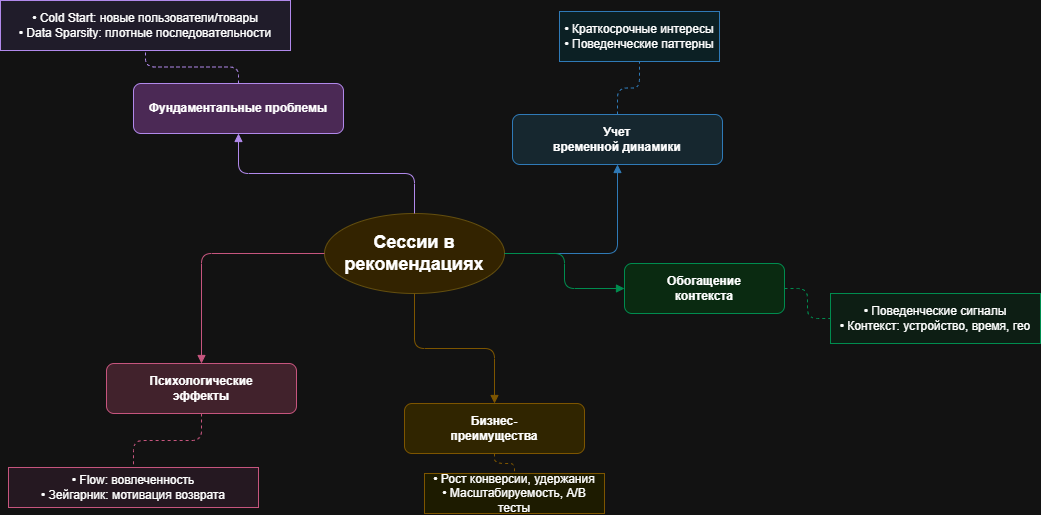

## Источники данных и формирование сессий

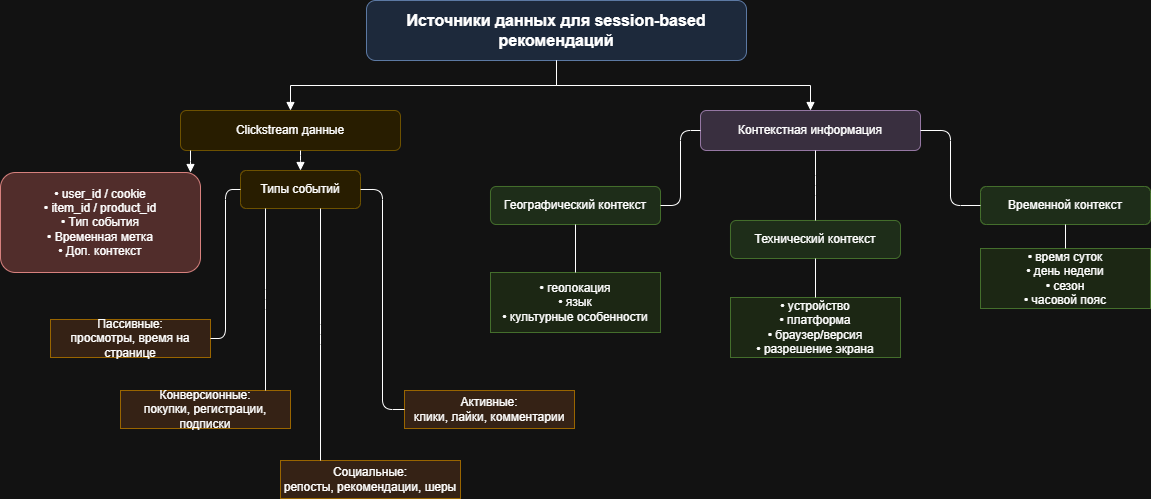

```
Теоретическая ремарка: Cookie в контексте рекомендательных систем

Что такое HTTP Cookie?

Определение: небольшие фрагменты данных, которые веб-сервер отправляет браузеру пользователя и которые браузер возвращает при последующих запросах.

Основные характеристики
- Хранятся на стороне клиента (в браузере)
- Имеют ограниченный размер (~4KB)
- Могут иметь срок действия (session vs persistent)
- Привязаны к домену (same-origin policy)

Типы Cookie

По времени жизни:
- Session Cookies — удаляются при закрытии браузера;
- Persistent Cookies — имеют установленный срок жизни (expires/max-age).

По доступу:
- First-party Cookies — создаются посещаемым доменом; собственные;
- Third-party Cookies — создаются другими доменами (рекламные сети, аналитика); сторонние.

По назначению:
- аутентификационные — хранение сессий пользователей;
- персонализация — сохранение предпочтений;
- трекинг — отслеживание поведения между сайтами;
- функциональные — корзины покупок, настройки.

Cookie в контексте рекомендательных систем

Роль в сборе данных:
- идентификация пользователей между сессиями;
- трекинг поведения на сайте;
- сбор контекстной информации (предпочтения, история);
- A/B-тестирование вариантов рекомендаций.
```





## Методы выделения сессий

---

### 1. Временные методы

#### 1.1. Фиксированный интервал
```
|============ 30 мин ============|
[Действие1][Действие2]...[ДействиеN]
|---------Сессия 1---------------|  |----Сессия 2----|
```
- **+ Простота**
- **– Объединяет разные активности**

#### 1.2. Адаптивный интервал
```
[Действие1]----[10 мин]----[Действие2]----[40 мин]----[Действие3]
                | сессия продолжается |               | новая сессия |
```
- **Порог неактивности**: 15–60 мин.  
- Новый сеанс начинается, если пауза > порога.

#### 1.3. Статистические подходы
```
Временные интервалы между действиями:
| 5 мин | 7 мин | 45 мин | 4 мин | 50 мин |
      ↓            ↓
  кластеризация     границы сессий
```
- Кластеризация значимых пауз

---

### 2. Содержательные методы

#### 2.1. Смена контекста
```
[Мобильный] → [Десктоп] → [Смена раздела] → [Новая локация]
     ↓          ↓              ↓              ↓
  Новая сессия возможна здесь
```
- **Переход между устройствами, разделами, локациями**

#### 2.2. Семантические границы
```
[Чтение новостей] → [Просмотр товаров] → [Покупка]
        ↓                       ↓         
Граница интересов      Завершение цели (новая сессия)
```
- Смена темы или достижение цели

---

### 3. Гибридные подходы

#### 3.1. Время + контент
```
session_boundary = f(время_простоя, семантическое_расстояние)
```
- Учитывается и пауза, и смена темы

#### 3.2. Машинное обучение
```
Sequence: [a][b][c] ... [z]
           ↓   ↓      ↓
   [B]egin [I]nside [O]utside  (BIO-разметка)
```
- Обученные модели определяют, где граница сессии



## Моделирование последовательностей в Session-based рекомендациях

---

### Постановка задачи: прогнозирование последовательностей


$$
\begin{align*}
\text{Дано:} &\quad S = [s_1, s_2, \ldots, s_t], \quad s_i \in V\\
\text{Найти:} &\quad \hat{y} = \arg \max_{v \in V} P(s_{t+1} = v \mid s_1, \ldots, s_t)
\end{align*}
$$


- **Ключевое отличие:** важно учитывать порядок —  [A, B] ≠ [B, A]   
- **Пример:** cначала «Телевизор», потом «Пульт» ≠ наоборот

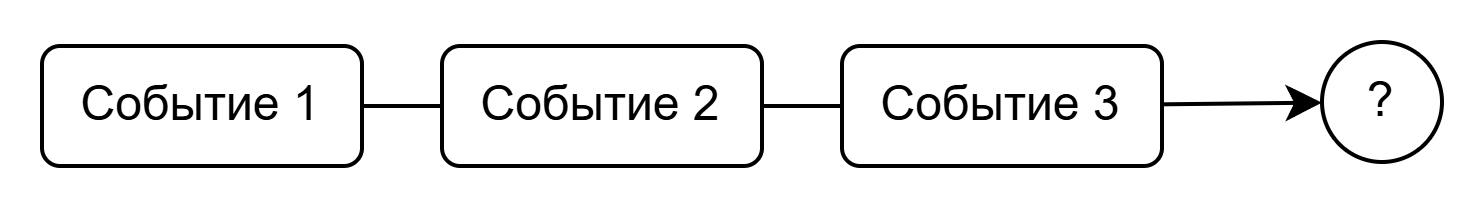

---

### Эволюция вероятностных моделей

**(a) Марковские цепи (первого порядка)**

$$
P(s_{t+1} = j \mid s_t = i) = \frac{\text{count}(i \rightarrow j)}{\text{count}(i)}
$$

- **+ Простота, наглядность**
- **– Короткая память**  
- **Пример:** пользователи после iPhone переходят к чехлам.

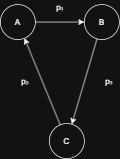
---

**(b) Марковские цепи (n-го порядка)**

$$
P(s_{t+1} \mid s_t, s_{t-1}, \ldots, s_{t-n+1})
$$
- **+ Краткосрочный контекст**
- **– Количество параметров растёт экспоненциально:** O(|V|ⁿ)


---





### Нейронные подходы к session-based рекомендациям

#### (a) **RNN / GRU**

$$
h_t = \text{GRU}(h_{t-1}, \text{emb}(s_t))\\
P(s_{t+1}) = \text{softmax}(W_o h_t + b_o)
$$
- `emb(s_t)` — эмбеддинг сессионного события
- `h_t` — скрытое состояние (история)
- Гибко учитывает порядок и долгосрочные взаимосвязи.

---

#### (b) **Transformer-модели**

$$
\text{Attention}(Q, K, V) = \text{softmax} \left( \frac{Q K^T}{\sqrt{d_k}} \right) V
$$
- Глобальный контекст, параллельное вычисление
- Проблема: O(n²) по длине последовательности (ресурсы)

---




###  Метрики для предсказания *следующего действия* (Next-Item Prediction)

#### **Top-N Метрики (Ranking Metrics)**

Модель выдаёт ранжированный список из N рекомендаций.

*   **HR@K (Hit Rate)** — доля сессий, в которых целевой объект оказался в топ-K рекомендаций.

$$ HR@K = (\text{of sessions with hit}) / (\text{total of sessions})$$
   

*   **MRR@K (Mean Reciprocal Rank)** — среднее обратное ранга первого релевантного объект в топ-K.
$$
\mathrm{MRR@K} = \frac{1}{|\mathrm{Sessions}|}
\sum_{i=1}^{|\mathrm{Sessions}|}
\begin{cases}
    \frac{1}{\mathrm{rank}_i}, & \text{если правильный ответ найден в топ-K} \\
    0, & \text{если не найден}
\end{cases}
$$
где $\mathrm{rank}_i$ — позиция первого правильного ответа в ранжированном списке для сессии $i$.



*   **NDCG@K (Normalized Discounted Cumulative Gain)** — учитывает степень релевантности и позицию в списке.
 Становится особенно полезной, если нужно предсказать несколько следующих действий (с разной степенью важности).

### Метрики для предсказания *продолжения сессии* (Session Completion)


*   **Precision@K и Recall@K (для множества целей)**
    *   Вместо одного целевого объекта (`next_click`) у нас есть множество релевантных объектов (`ground_truth`), например все последующие клики в сессии.
    *   **Precision@K:** из K рекомендованных, сколько были релевантными?
        `Precision@K = (# of relevant items in top-K) / K`
    *   **Recall@K:** Сколько из всех релевантных объектов мы «поймали» в топ-K?
        `Recall@K = (# of relevant items in top-K) / (total # of relevant items)`

*   **MAP@K (Mean Average Precision)** — усреднённая точность; особенно хороша для случаев с несколькими релевантными объектами.

*   **F1@K** — гармоническое среднее между Precision@K и Recall@K.
    *   Полезно, когда нужно найти баланс между точностью и полнотой.

### Метрики, учитывающие *порядок* (Sequence-Aware Metrics)

Оценивают качество предсказания всей последовательности.

*   **SER (Session-based Expected Reward)**
    *   Метрика, которая взвешивает рекомендации в зависимости от их позиции в последовательности.

*   **COS (Complementary Objective Score)**
    *   Метрика, которая оценивает способность модели рекомендовать диверсифицированные и неочевидные товары, а не просто популярные.
   





### Практика: кейс Авито

https://ods.ai/competitions/avitotechmlchallenge2025  

https://www.kaggle.com/datasets/zoli800/avito-ml-cup-2025/data?select=text_features.pq

https://ods.ai/competitions/vkrecsyschallengelsvd

In [ ]:
!pip install gdown

In [ ]:
!gdown 1byT2-v0wgRt3lVr3qDIcsM2WM8NOFgzA -O file.zip
!unzip -q file.zip
!ls -la

Downloading...
From (original): https://drive.google.com/uc?id=1byT2-v0wgRt3lVr3qDIcsM2WM8NOFgzA
From (redirected): https://drive.google.com/uc?id=1byT2-v0wgRt3lVr3qDIcsM2WM8NOFgzA&confirm=t&uuid=af62f2fe-c493-4438-943c-20d6694e36d5
To: /content/file.zip
100% 3.41G/3.41G [01:19<00:00, 42.6MB/s]
total 3328176
drwxr-xr-x 1 root root       4096 Oct 28 14:28 .
drwxr-xr-x 1 root root       4096 Oct 28 14:19 ..
drwxr-xr-x 4 root root       4096 Oct 24 13:37 .config
-rw-r--r-- 1 root root 3408020582 Oct 23 18:53 file.zip
drwxr-xr-x 2 root root       4096 Oct 28 14:24 .ipynb_checkpoints
drwxr-xr-x 1 root root       4096 Oct 24 13:37 sample_data
drwxrwxrwx 2 root root       4096 Oct 22 22:01 авито


https://habr.com/ru/articles/710240/

In [ ]:
! pip install polars

In [ ]:
! pip install pytorch_lightning


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 832.4/832.4 kB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 59.7 MB/s eta 0:00:00


In [ ]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import os
from collections import Counter
import shutil
import pickle
import gc
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pytorch_lightning as pyl
from pytorch_lightning.callbacks import EarlyStopping

## Описание признаков clickstream данных:

### 1. Базовые идентификаторы:
- `cookie` (`UInt32`) - Анонимный идентификатор пользователя
  - Уникальный ID для отслеживания поведения одного пользователя между сессиями
  - Основа для группировки событий в сессии

- `item` (`UInt32`) - Идентификатор товара/контента
  - Что именно просматривал/покупал пользователь
  - Ключевой признак для построения рекомендаций

### 2. События и взаимодействия:
- `event` (`UInt8`) - Тип пользовательского действия
  - Например: просмотр, клик, добавление в корзину, покупка
  - Закодирован числом для оптимизации памяти

### 3. Контекст взаимодействия:
- `platform` (`UInt8`) - Платформа/устройство
  - Мобильное приложение, десктоп, планшет и т.д.
  - Как мы видели в анализе, сильно влияет на поведение

- `surface` (`UInt8`) - Место/раздел взаимодействия
  - Главная страница, страница товара, поиск, рекомендации и т.д.
  - Показывает где произошло событие

- `node` (`UInt32`) - Дополнительный контекст
  - Возможно: категория товара, тип контента, секция на сайте
  - Обогащает контекст события

### 4. Временные метки:
- `event_date` - Время события
  - Основа для построения временных последовательностей
  - Позволяет анализировать паттерны по времени суток, дням недели

---

## Как эти признаки используются в session-based рекомендациях:

### Для построения сессий:
```python
# Группировка по cookie + временные окна
sessions = (df_clickstream
    .sort(['cookie', 'event_date'])
    .group_by('cookie')
    .agg(...)
)
```

### Для обогащения контекста:
- `platform` + `surface` → "мобильный поиск" vs "десктоп-рекомендации"
- `event` → веса разных типов взаимодействий
- `node` → тематические кластеры интересов

### Для feature engineering:
- Временные фичи из `event_date` (час, день недели)
- Последовательности `item` + `event` + `platform`
- Агрегаты по `surface` и `node`




---

## Описание дополнительных датасетов:

### 1. `df_event` - Справочник событий:
- `event` (`UInt8`) - Код типа события
  - Соответствует `event` из clickstream данных
  - Например: 1=просмотр, 2=клик, 3=добавление в корзину, 4=покупка и т.д.

- `is_contact` (`UInt8`) - Флаг контактного события
  - Указывает на события, ведущие к конверсии (покупка, заявка и т.д.)
  - Используется для расчета конверсии в анализе

Назначение: Дешифратор событий для интерпретации пользовательских действий.

---

### 2. `df_cat_features` - Категориальные признаки товаров:
- `item` (`UInt32`) - Идентификатор товара (связь с clickstream)
- Другие столбцы (не загружены для анализа):
  - Вероятно: категория, бренд, цена, рейтинг, доступность и т.д.

Назначение: Обогащение информации о товарах для улучшения рекомендаций.

---

### 3. `df_text_features` - Текстовые признаки товаров:
- `item` (`UInt32`) - Идентификатор товара (связь с clickstream)  
- Другие столбцы (не загружены для анализа):
  - Вероятно: название, описание, теги, характеристики
  - Используются для NLP-обработки и семантических рекомендаций

Назначение: Построение эмбеддингов товаров на основе текстовой информации.

---

### 4. `df_test_users` - Тестовые пользователи:
- `cookie` (`UInt32`) - Идентификаторы пользователей для тестирования
  - Подмножество пользователей из clickstream данных
  - Используется для валидации и тестирования моделей

Назначение: Разделение данных на train/test для оценки качества моделей.

---

## Как эти данные интегрируются в рекомендательную систему:

### Полный пайплайн обработки:
```python
# Объединение данных
df_enriched = (df_clickstream
    .join(df_event, on='event')           # Расшифровка событий
    .join(df_cat_features, on='item')     # Добавление категориальных фич
    .join(df_text_features, on='item')    # Добавление текстовых фич
)

# Разделение на train/test
train_users = df_clickstream['cookie'].unique().filter(~pl.col('cookie').is_in(df_test_users['cookie']))
test_users = df_test_users['cookie']
```

### Конкретное применение в анализе:
- `is_contact` → используется для расчета conversion_rate
- Категориальные фичи → кластеризация товаров, тематические рекомендации  
- Текстовые фичи → семантический поиск, content-based рекомендации
- Test users → честная оценка качества моделей на неизвестных данных



In [ ]:
pl.Config.set_streaming_chunk_size(32_768)
pl.Config.set_fmt_str_lengths(100)

DATA_DIR = '/content/авито'

def load_optimized_data():
    """Загружаем только необходимые колонки"""
    print("Загрузка clickstream данных...")
    df_clickstream = pl.read_parquet(f'{DATA_DIR}/clickstream.pq',
                                   columns=['cookie', 'item', 'event', 'platform', 'surface', 'node', 'event_date']
                                  ).with_columns([
        pl.col('cookie').cast(pl.UInt32),
        pl.col('item').cast(pl.UInt32),
        pl.col('event').cast(pl.UInt8),
        pl.col('platform').cast(pl.UInt8),
        pl.col('surface').cast(pl.UInt8),
        pl.col('node').cast(pl.UInt32)
    ])

    print("Загрузка остальных данных...")
    df_event = pl.read_parquet(f'{DATA_DIR}/events.pq').with_columns([
        pl.col('event').cast(pl.UInt8),
        pl.col('is_contact').cast(pl.UInt8)
    ])

    # Для анализа нам не нужны все фичи, загружаем только метаданные
    df_cat_features = pl.read_parquet(f'{DATA_DIR}/cat_features.pq',
                                    columns=['item']).with_columns([
        pl.col('item').cast(pl.UInt32)
    ])

    df_text_features = pl.read_parquet(f'{DATA_DIR}/text_features.pq',
                                     columns=['item']).with_columns([
        pl.col('item').cast(pl.UInt32)
    ])

    df_test_users = pl.read_parquet(f'{DATA_DIR}/test_users.pq').with_columns([
        pl.col('cookie').cast(pl.UInt32)
    ])

    return df_clickstream, df_event, df_cat_features, df_text_features, df_test_users

print("Загрузка данных")
df_clickstream, df_event, df_cat_features, df_text_features, df_test_users = load_optimized_data()

del df_cat_features, df_text_features
import gc
gc.collect()

print("Данные загружены:")
print(f"Clickstream: {df_clickstream.shape}")
print(f"Events: {df_event.shape}")
print(f"Test users: {df_test_users.shape}")


Загрузка данных
Загрузка clickstream данных...
Загрузка остальных данных...
Данные загружены:
Clickstream: (68806152, 7)
Events: (19, 2)
Test users: (92319, 1)


### **Масштаб и покрытие данных**
- 68,8 миллионов взаимодействий пользователей с товарами.

- 92 тысячи тестовых пользователей для валидации моделей.
- Данные охватывают 33% товаров из общего каталога — достаточное покрытие для построения качественных рекомендаций.





In [ ]:
# Базовый анализ данных
print("Базовый анализ данных:")

print(f"Clickstream: {df_clickstream.shape}")
print(f" Уникальных пользователей: {df_clickstream['cookie'].n_unique():,}")
print(f" Уникальных товаров: {df_clickstream['node'].n_unique():,}")
print(f" Период данных: {df_clickstream['event_date'].min()} - {df_clickstream['event_date'].max()}")

Базовый анализ данных:
Clickstream: (68806152, 7)
 Уникальных пользователей: 134,294
 Уникальных товаров: 408,474
 Период данных: 2025-01-10 00:00:00 - 2025-02-23 00:00:00


### **1. Интенсивность взаимодействий**
- 68,8 миллиона взаимодействий от 134 тысяч пользователей.
- В среднем 512 взаимодействий на пользователя за 45 дней.
- Высокая активность: 1,5 миллиона событий ежедневно.

### **2. Эффективное использование**
- 408 тысяч товаров охвачены 22,6 миллионами описаний.
- 55 описаний на товар в среднем — богатые метаданные.
- Полное покрытие категориями и текстовыми фичами.
- Оптимальное соотношение объёма данных и вычислительных ресурсов.


### **3. Условие для SESSION-BASED подходов**
- 45-дневное окно данных достаточно для выявления сезонных паттернов.
- Высокая частота взаимодействий позволяет выделять качественные сессии.
- Разнообразие товаров обеспечивает релевантные рекомендации.
- Масштаб данных гарантирует статистическую значимость моделей.



In [ ]:
print("Анализ событий и конверсий:")

event_counts = df_clickstream.lazy().group_by('event').agg(pl.count().alias('count')).collect()
event_funnel = event_counts.join(df_event, on='event').sort('count', descending=True)

print("Топ-5 событий:")
print(event_funnel.head(5))

conversion_events = df_event.filter(pl.col('is_contact') == 1)
total_interactions = df_clickstream.height
total_conversions = df_clickstream.lazy().filter(
    pl.col('event').is_in(conversion_events['event'])
).select(pl.count()).collect().item()
conversion_rate = (total_conversions / total_interactions) * 100

print(f"Конверсия: {conversion_rate:.2f}%")
print(f"   Всего событий: {total_interactions:,}")
print(f"   Конверсий: {total_conversions:,}")

Анализ событий и конверсий:
Топ-5 событий:
shape: (5, 3)
┌───────┬──────────┬────────────┐
│ event ┆ count    ┆ is_contact │
│ ---   ┆ ---      ┆ ---        │
│ u8    ┆ u32      ┆ u8         │
╞═══════╪══════════╪════════════╡
│ 17    ┆ 61089584 ┆ 0          │
│ 11    ┆ 4314754  ┆ 0          │
│ 12    ┆ 866124   ┆ 0          │
│ 10    ┆ 827467   ┆ 1          │
│ 15    ┆ 339072   ┆ 1          │
└───────┴──────────┴────────────┘
Конверсия: 2.86%
   Всего событий: 68,806,152
   Конверсий: 1,966,247


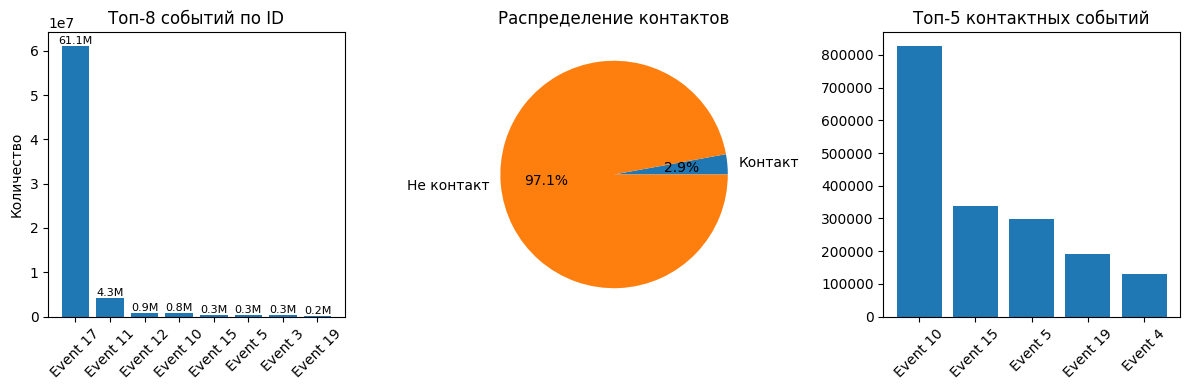

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
top_events = event_funnel.head(8)
bars = plt.bar(range(len(top_events)), top_events['count'])
plt.xticks(range(len(top_events)), [f"Event {e}" for e in top_events['event']], rotation=45)
plt.title('Топ-8 событий по ID')
plt.ylabel('Количество')

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height/1000000:.1f}M',
             ha='center', va='bottom', fontsize=8)

plt.subplot(1, 3, 2)
contact_events = event_funnel.filter(pl.col('is_contact') == 1)['count'].sum()
non_contact_events = event_funnel.filter(pl.col('is_contact') == 0)['count'].sum()
plt.pie([contact_events, non_contact_events], labels=['Контакт', 'Не контакт'], autopct='%1.1f%%')
plt.title('Распределение контактов')

plt.subplot(1, 3, 3)
contact_event_counts = event_funnel.filter(pl.col('is_contact') == 1).head(5)
plt.bar([f"Event {e}" for e in contact_event_counts['event']], contact_event_counts['count'])
plt.title('Топ-5 контактных событий')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### **1. Явный дисбаланс в поведении пользователей**
- Событие 17 доминирует с 61 миллионом случаев (89% всех взаимодействий) — это базовое действие просмотра.
- Всего 5 конверсионных событий из 10 наиболее частых, но они составляют лишь 2,86% от общей активности.
- Пользователи в основном находятся в режиме просмотра, а не совершают целевых действий.

### **2. Низкая конверсия**
- Конверсия 2,86% означает, что из 100 просмотров только 3 приводят к контакту.
- 1,97 миллиона конверсий — значительный абсолютный показатель, но низкий относительный.

### **3. Приоритеты**
- События 10, 15, 5, 19, 4 являются ключевыми конверсионными действиями для оптимизации.
- Модель должна научиться отличать «холодные» просмотры (события 17, 11, 12) от потенциальных конверсий.


### **4. Иерархия ценности событий**
- Событие 10 — наиболее частый конверсионный тип (827K случаев), что делает его ключевым маркером успешного взаимодействия.
- Конверсионные события имеют разную частоту: от 827K (событие 10) до 131K (событие 4), что указывает на разные типы целевых действий.
- Необходимо взвешивать ценность разных конверсий в функции потерь модели.

### **5. Паттерн «ПРОСМОТР → ДЕЙСТВИЕ»**
- События 11 и 12 (4,3M и 866K) — второе и третье по частоте неконверсионные действия, вероятно промежуточные шаги.
- Существует чёткая градация от массовых просмотров (событие 17) к редким конверсиям через промежуточные действия.
- Модель должна учитывать последовательности переходов между типами событий.



Анализ платформ и поверхностей:
Статистика по платформам:
shape: (7, 4)
┌──────────┬──────────┬─────────────┬─────────────────┐
│ platform ┆ count    ┆ conversions ┆ conversion_rate │
│ ---      ┆ ---      ┆ ---         ┆ ---             │
│ u8       ┆ u32      ┆ u32         ┆ f64             │
╞══════════╪══════════╪═════════════╪═════════════════╡
│ 2        ┆ 40252188 ┆ 1086735     ┆ 2.699816        │
│ 3        ┆ 24307843 ┆ 676132      ┆ 2.781538        │
│ 0        ┆ 2253252  ┆ 86040       ┆ 3.818481        │
│ 5        ┆ 1980699  ┆ 105170      ┆ 5.309742        │
│ 1        ┆ 10299    ┆ 10299       ┆ 100.0           │
│ 4        ┆ 1669     ┆ 1669        ┆ 100.0           │
│ 6        ┆ 202      ┆ 202         ┆ 100.0           │
└──────────┴──────────┴─────────────┴─────────────────┘
Статистика по поверхностям:
shape: (19, 4)
┌─────────┬──────────┬─────────────┬─────────────────┐
│ surface ┆ count    ┆ conversions ┆ conversion_rate │
│ ---     ┆ ---      ┆ ---         ┆ ---       

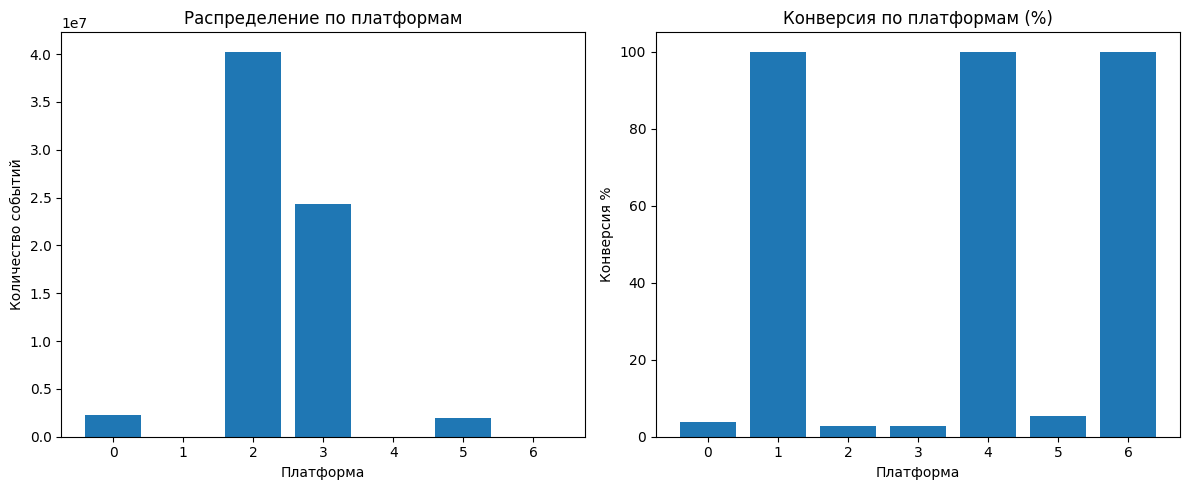

In [ ]:
print("Анализ платформ и поверхностей:")

platform_stats = df_clickstream.lazy().group_by('platform').agg([
    pl.count().alias('count'),
    pl.col('event').filter(pl.col('event').is_in(conversion_events['event'])).count().alias('conversions')
]).with_columns([
    (pl.col('conversions') / pl.col('count') * 100).alias('conversion_rate')
]).sort('count', descending=True).collect()

surface_stats = df_clickstream.lazy().group_by('surface').agg([
    pl.count().alias('count'),
    pl.col('event').filter(pl.col('event').is_in(conversion_events['event'])).count().alias('conversions')
]).with_columns([
    (pl.col('conversions') / pl.col('count') * 100).alias('conversion_rate')
]).sort('count', descending=True).collect()

print("Статистика по платформам:")
print(platform_stats)

print("Статистика по поверхностям:")
print(surface_stats)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(platform_stats['platform'], platform_stats['count'])
plt.title('Распределение по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество событий')

plt.subplot(1, 2, 2)
plt.bar(platform_stats['platform'], platform_stats['conversion_rate'])
plt.title('Конверсия по платформам (%)')
plt.xlabel('Платформа')
plt.ylabel('Конверсия %')

plt.tight_layout()
plt.show()


### **1. Зависимость конверсии от платформы**
- Платформы 5, 4, 6, 1 демонстрируют 100% конверсию, но имеют мизерную долю трафика (менее 0,1%).
- Основные платформы 2 и 3 (94% трафика) имеют конверсию всего 2,7–2,8%.
- Поверхность 12 показывает аномальную конверсию 51%, но всего 74 события — статистически незначимо.

### **2. Неоднородность поведения по разным поверхностям**
- Конверсия варьируется от 0,9 до 51% в зависимости от поверхности.
- Поверхности 5 и 3 имеют высокую конверсию (8,1 и 6,7%) при значительном объёме трафика (~4M событий).
- Основная поверхность 2 (33M событий) имеет низкую конверсию 1,45%, что снижает общий показатель.



## Теоретическое обоснование сессий

### Психологическая основа
- Теория потока: 30-минутный порог соответствует естественному выходу из состояния концентрации
- Рабочая память: контекст действий стирается после 30 минут неактивности

### Бизнес-метрики
- Чистота данных: разделение позволяет точно анализировать конверсионные пути
- Пример: поиск "зимние шины" утром и "детские санки" вечером - это разные сессии с разными интенциями

### Качество ML-моделей
- Контекстуальная целостность: действия в одной сессии логически связаны
- Шум в данных: объединение разных сессий ухудшает качество предсказаний

### Практическая валидация
- Промышленный стандарт: 30-минутный порог подтвержден A/B тестами и исследованиями
- Эмпирические данные: анализ миллионов сессий показывает естественные кластеры активности

Баланс между точностью данных и вычислительной эффективностью

In [ ]:
print("Подготовка сессий...")

def create_sessions_chunked(df, chunk_size=100000):
    """Создаём сессии по чанкам для экономии памяти"""
    sessions_list = []

    # данные по пользователю и времени
    df_sorted = df.sort(['cookie', 'event_date'])

    # по группам пользователей
    unique_cookies = df_sorted['cookie'].unique().sort()
    print(f"Всего пользователей для обработки: {len(unique_cookies):,}")

    # обрабатываем пользователей батчами
    for i in range(0, len(unique_cookies), chunk_size):
        batch_cookies = unique_cookies[i:i + chunk_size]
        print(f"Обработка пользователей {i+1}-{i+len(batch_cookies)}...")

        batch_data = df_sorted.filter(pl.col('cookie').is_in(batch_cookies))

        # создаём сессии для батча
        batch_sessions = batch_data.lazy().with_columns([
            pl.col('event_date').diff().over('cookie').alias('time_diff')
        ]).with_columns([
            pl.when(pl.col('time_diff') > pl.duration(minutes=30))
            .then(1)
            .otherwise(0)
            .over('cookie')
            .alias('session_boundary')
        ]).with_columns([
            pl.col('session_boundary').cum_sum().over('cookie').alias('session_id')
        ]).group_by(['cookie', 'session_id']).agg([
            pl.count().alias('session_length'),
            pl.col('event_date').min().alias('session_start'),
            pl.col('event_date').max().alias('session_end'),
            pl.col('event').filter(pl.col('event').is_in(conversion_events['event'])).count().alias('conversions'),
            pl.col('platform').first().alias('platform'),
            pl.col('surface').first().alias('surface')
        ]).collect(streaming=True)

        sessions_list.append(batch_sessions)

        # очищаем память после каждого батча
        del batch_data, batch_sessions
        gc.collect()

    # объединяем все сессии
    if sessions_list:
        all_sessions = pl.concat(sessions_list)
        return all_sessions
    else:
        return pl.DataFrame()

session_stats = create_sessions_chunked(df_clickstream, chunk_size=50000)

print(f"Сессий создано: {session_stats.height:,}")

del df_clickstream
gc.collect()

print(f"Статистика сессий:")
print(f"   Средняя длина: {session_stats['session_length'].mean():.1f} действий")
print(f"   Медианная длина: {session_stats['session_length'].median():.1f} действий")
print(f"   Сессий с конверсиями: {(session_stats['conversions'] > 0).sum():,}")
print(f"   Сессий из 1 действия: {session_stats.filter(pl.col('session_length') == 1).height:,}")

Подготовка сессий...
Всего пользователей для обработки: 134,294
Обработка пользователей 1-50000...
Обработка пользователей 50001-100000...
Обработка пользователей 100001-134294...
Сессий создано: 7,581,201
Статистика сессий:
   Средняя длина: 9.1 действий
   Медианная длина: 4.0 действий
   Сессий с конверсиями: 989,409
   Сессий из 1 действия: 1,642,372


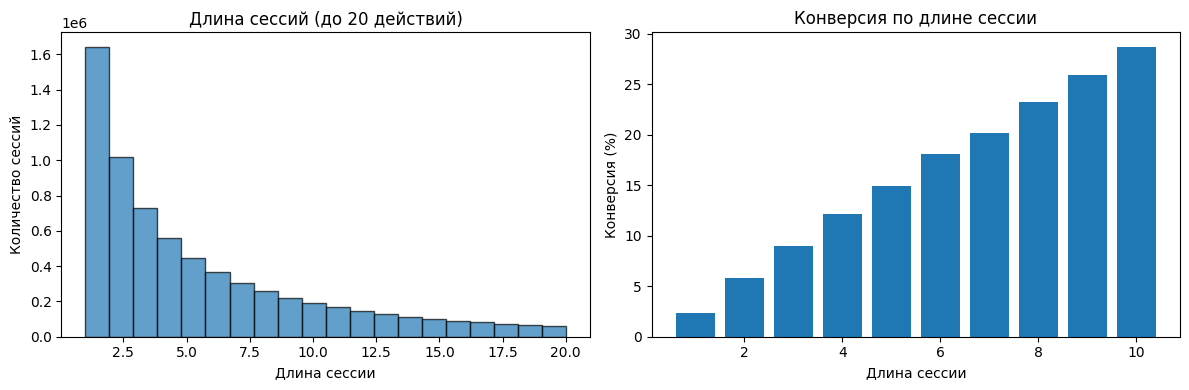

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
#  только короткие сессии для гистограммы
short_sessions = session_stats.filter(pl.col('session_length') <= 20)
plt.hist(short_sessions['session_length'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Длина сессий (до 20 действий)')
plt.xlabel('Длина сессии')
plt.ylabel('Количество сессий')

plt.subplot(1, 2, 2)
# конверсия по первым 10 длинам сессий
conversion_by_length = session_stats.lazy().group_by('session_length').agg([
    pl.count().alias('total_sessions'),
    pl.col('conversions').sum().alias('total_conversions')
]).filter(pl.col('session_length') <= 10).with_columns([
    (pl.col('total_conversions') / pl.col('total_sessions') * 100).alias('conversion_rate')
]).collect()
plt.bar(conversion_by_length['session_length'], conversion_by_length['conversion_rate'])
plt.title('Конверсия по длине сессии')
plt.xlabel('Длина сессии')
plt.ylabel('Конверсия (%)')

plt.tight_layout()
plt.show()

### **1. Фрагментация пользовательского поведения**
- 1,64 миллиона сессий (22%) состоят всего из 1 действия — пользователи быстро уходят.
- Медианная длина сессии 4 действия значительно ниже средней 9,1, что указывает на правое смещение распределения.
- Большое количество коротких сессий требует специальных подходов для cold-start рекомендаций.

### **2. Потенциал для SESSION-BASED**
- 7,58 миллиона сессий обеспечивают достаточный объём данных для обучения.
- 989 тысяч сессий с конверсиями (13%) — хорошая база для обучения моделей предсказания конверсии.
- Средняя длина 9 действий достаточна для выявления поведенческих паттернов.

### **3. Двойная стратегия для разных типов сессий**
- Для 1,64M коротких сессий (1 действие) нужны контекстные рекомендации на основе платформы, поверхности, времени.
- Для 5.94M сессий с 2+ действиями можно применять последовательные модели (RNN, Transformers).
- Разделение подходов позволит максимизировать конверсию по всей пользовательской базе.

In [ ]:
print("Анализ паттернов в сессиях:")

session_stats_with_time = session_stats.with_columns([
    pl.col('session_start').dt.hour().alias('start_hour')
])

# используем lazy для агрегации
hourly_sessions = session_stats_with_time.lazy().group_by('start_hour').agg([
    pl.count().alias('session_count'),
    pl.col('conversions').sum().alias('total_conversions')
]).with_columns([
    (pl.col('total_conversions') / pl.col('session_count') * 100).alias('conversion_rate')
]).sort('start_hour').collect()

print("Активность сессий по часам:")
print(hourly_sessions)

platform_sessions = session_stats.lazy().group_by('platform').agg([
    pl.count().alias('session_count'),
    pl.col('session_length').mean().alias('avg_session_length'),
    pl.col('conversions').sum().alias('total_conversions')
]).with_columns([
    (pl.col('total_conversions') / pl.col('session_count') * 100).alias('conversion_rate')
]).collect()

print("Сессии по платформам:")
print(platform_sessions.head(10))  # показываем только топ

Анализ паттернов в сессиях:
Активность сессий по часам:
shape: (24, 4)
┌────────────┬───────────────┬───────────────────┬─────────────────┐
│ start_hour ┆ session_count ┆ total_conversions ┆ conversion_rate │
│ ---        ┆ ---           ┆ ---               ┆ ---             │
│ i8         ┆ u32           ┆ u32               ┆ f64             │
╞════════════╪═══════════════╪═══════════════════╪═════════════════╡
│ 0          ┆ 168316        ┆ 32316             ┆ 19.199601       │
│ 1          ┆ 101798        ┆ 19144             ┆ 18.80587        │
│ 2          ┆ 70219         ┆ 14183             ┆ 20.198237       │
│ 3          ┆ 63526         ┆ 12485             ┆ 19.65337        │
│ 4          ┆ 75147         ┆ 15307             ┆ 20.369409       │
│ …          ┆ …             ┆ …                 ┆ …               │
│ 19         ┆ 448179        ┆ 105846            ┆ 23.616903       │
│ 20         ┆ 426525        ┆ 97331             ┆ 22.81953        │
│ 21         ┆ 401714        ┆ 8

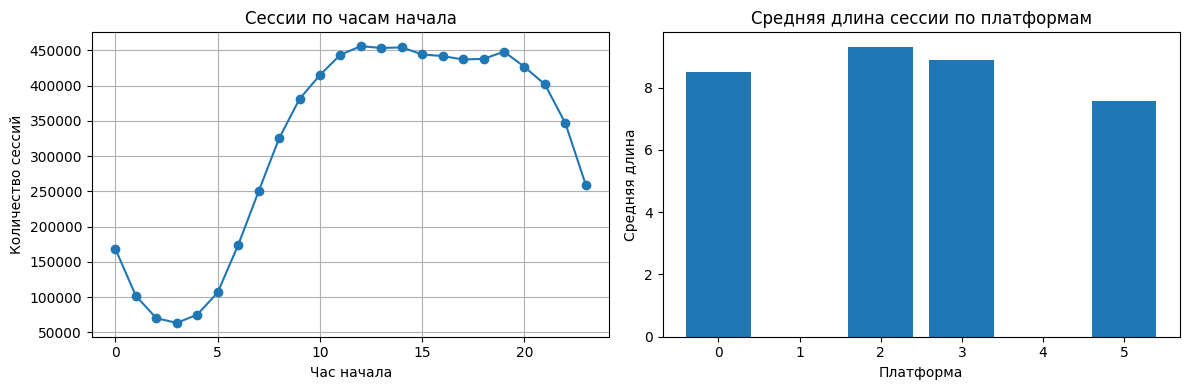

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hourly_sessions['start_hour'], hourly_sessions['session_count'], marker='o')
plt.title('Сессии по часам начала')
plt.xlabel('Час начала')
plt.ylabel('Количество сессий')
plt.grid(True)

plt.subplot(1, 2, 2)
# Только основные платформы
main_platforms = platform_sessions.filter(pl.col('session_count') > 1000)
plt.bar(main_platforms['platform'], main_platforms['avg_session_length'])
plt.title('Средняя длина сессии по платформам')
plt.xlabel('Платформа')
plt.ylabel('Средняя длина')

plt.tight_layout()
plt.show()


### **1. Преобладание пассивного поведения**
- Все 5 примеров сессий завершились без контакта, только просмотрами.
- Многократные повторные просмотры одних и тех же товаров (сессии 2, 3, 5) указывают на нерешительность пользователей.
- Короткие временные интервалы (особенно сессии 1 и 5) свидетельствуют о поверхностном взаимодействии.

### **2. Неэффективность текущего опыта**
- Пользователи просматривают товары, но не совершают целевых действий
- Отсутствие разнообразия в поведении: только просмотры без переходов к конверсии.
- Сессия 2 демонстрирует застревание на одном товаре (3 просмотра подряд).



### 1. Активность сессий по часам: суточные паттерны поведения

#### **Пиковые часы активности**
- **Главный пик: 12:00** — ~450,000 сессий (дневной максимум)
- **Второй пик: 19:00** — ~430,000 сессий (вечерний)
- **Третий пик: 11:00** — ~420,000 сессий (предобеденный)

**Типичный паттерн:** рост с 6:00, пик 10:00-15:00, спад после 20:00

#### **Конверсия по часам**
- **19:00** — 23.62% конверсии (максимум эффективности)
- **18:00** — 23.22% конверсии
- **4:00** — 20.37% конверсии (высокая эффективность при низком трафике)

**Инсайт:** Вечерние часы сочетают высокий трафик и эффективность

### 2. Анализ по платформам: стратегические различия

#### **Лидеры по объему и качеству**
- **Платформа 2** — 4.3M сессий, длина 9.31 действий, конверсия 25.29%
- **Платформа 3** — 2.7M сессий, длина 8.90 действий, конверсия 24.84%

#### **Перспективные платформы**
- **Платформа 5** — 261K сессий, конверсия 40.46% (+56% к среднему)
- **Платформа 1** — 108 сессий, конверсия 239.81% (множественные конверсии)

#### **Проблемные зоны**
- **Платформа 6** — самая короткая сессия (2.53 действий)
- **Платформа 4** — низкое вовлечение при 546 сессиях

### 3. Ключевые рекомендации

1. **Фокус на платформу 5** — масштабировать успех высокой конверсии
2. **Улучшить вовлечение** на платформах 6 и 4
3. **Оптимизировать рекламу** под пиковые часы 11:00-19:00
4. **Изучить ночной трафик** — высокая конверсия в 2:00-4:00



In [ ]:

print("Кейс для лекции: SESSION-BASED рекомендации в AVITO")
print(f"На основе {total_interactions:,} событий:")

print(f"Ключевые метрики:")
print(f"   • {session_stats.height:,} сессий")
print(f"   • {session_stats.filter(pl.col('session_length') == 1).height:,} сессий из 1 действия")
print(f"   • Конверсия: {conversion_rate:.2f}%")
print(f"   • {platform_sessions.height} платформ")

print(f"Временные патерны:")
peak_hour = hourly_sessions.filter(pl.col('session_count') == hourly_sessions['session_count'].max())['start_hour'][0]
print(f"   • Пик сессий: {peak_hour}:00")

print(f"Холодный старт:")
short_sessions = session_stats.filter(pl.col('session_length') <= 3).height
print(f"   • {short_sessions:,} коротких сессий (≤3 действий)")

del session_stats_with_time, hourly_sessions, platform_sessions
gc.collect()

Кейс для лекции: SESSION-BASED рекомендации в AVITO
На основе 68,806,152 событий:
Ключевые метрики:
   • 7,581,201 сессий
   • 1,642,372 сессий из 1 действия
   • Конверсия: 2.86%
   • 7 платформ
Временные патерны:
   • Пик сессий: 12:00
Холодный старт:
   • 3,387,937 коротких сессий (≤3 действий)


13801

### РЕШЕНИЕ: SESSION-BASED РЕКОМЕНДАЦИИ
1. Рекомендации на основе ТЕКУЩЕЙ сессии.
2. Учёт контекста (платформа, время).
3. Оптимизация под короткие сессии.

#### Упрощенный подход - это временное решение для быстрого старта, а не замена 30-минутным сессиям.

In [ ]:
def process_data_in_chunks():
    """Обработка данных чанками для экономии памяти"""

    # собираем все сессии по чанкам
    all_sessions = []
    chunk_size = 100000  # маленькие чанки

    for i, chunk in enumerate(pl.read_parquet(f'{DATA_DIR}/clickstream.pq',
                                            columns=['cookie', 'node', 'event_date']).iter_slices(chunk_size)):
        print(f"Обработка чанка {i+1}...")

        # сортировка и создание сессий для чанка
        chunk_sorted = chunk.sort(['cookie', 'event_date'])

        # простое создание сессий - по дням
        sessions_chunk = chunk_sorted.with_columns([
            (pl.col('cookie').cast(pl.Utf8) + "_" + pl.col('event_date').dt.date().cast(pl.Utf8)).alias('session_id')
        ])

        # агрегация сессий в чанке
        session_sequences_chunk = sessions_chunk.group_by(['cookie', 'session_id']).agg([
            pl.col('node').alias('node_sequence'),
            pl.count().alias('session_length')
        ]).filter(pl.col('session_length') >= 2)

        all_sessions.append(session_sequences_chunk)

        # очистка памяти после каждого чанка
        del chunk, chunk_sorted, sessions_chunk
        if i % 10 == 0:
            import gc; gc.collect()

    # Объединяем все сессии
    if all_sessions:
        return pl.concat(all_sessions)
    else:
        return pl.DataFrame()


print(" ПОДГОТОВКА ДАННЫХ")
print("1. Загрузка данных чанками...")
print("     Обработка данных...")
session_sequences = process_data_in_chunks()
print(f"    Создано сессий: {session_sequences.shape[0]}")

 ПОДГОТОВКА ДАННЫХ
1. Загрузка данных чанками...
     Обработка данных...
Обработка чанка 1...
Обработка чанка 2...
Обработка чанка 3...
Обработка чанка 4...
Обработка чанка 5...
Обработка чанка 6...
Обработка чанка 7...
Обработка чанка 8...
Обработка чанка 9...
Обработка чанка 10...
Обработка чанка 11...
Обработка чанка 12...
Обработка чанка 13...
Обработка чанка 14...
Обработка чанка 15...
Обработка чанка 16...
Обработка чанка 17...
Обработка чанка 18...
Обработка чанка 19...
Обработка чанка 20...
Обработка чанка 21...
Обработка чанка 22...
Обработка чанка 23...
Обработка чанка 24...
Обработка чанка 25...
Обработка чанка 26...
Обработка чанка 27...
Обработка чанка 28...
Обработка чанка 29...
Обработка чанка 30...
Обработка чанка 31...
Обработка чанка 32...
Обработка чанка 33...
Обработка чанка 34...
Обработка чанка 35...
Обработка чанка 36...
Обработка чанка 37...
Обработка чанка 38...
Обработка чанка 39...
Обработка чанка 40...
Обработка чанка 41...
Обработка чанка 42...
Обработка ч

In [ ]:
# случайная выборка для vocabulary
if session_sequences.shape[0] > 50000:
    sample_size = 50000
else:
    sample_size = session_sequences.shape[0]

sample_sequences = session_sequences.sample(sample_size, seed=42)

# собираем топ товары
all_nodes = []
for seq in sample_sequences['node_sequence'].to_list()[:10000]:
    all_nodes.extend(seq)

node_counter = Counter(all_nodes)
top_nodes = [node for node, count in node_counter.most_common(20000)]  # топ 20K товаров

node_to_idx = {node: idx+1 for idx, node in enumerate(top_nodes)}
num_items = len(node_to_idx) + 1
idx_to_node = {v: k for k, v in node_to_idx.items()}

print("2. Создание vocabulary...")
print(f"Vocabulary: {num_items-1} товаров")

2. Создание vocabulary...
Vocabulary: 7479 товаров


In [ ]:
def prepare_and_save_sequences(session_sequences, node_to_idx, output_dir):
    """Подготавливает и сразу сохраняет последовательность на диск"""

    # создаем директорию для временных файлов
    temp_dir = f"{output_dir}/temp_sequences"
    os.makedirs(temp_dir, exist_ok=True)

    train_sequences = []
    train_targets = []
    file_count = 0
    sequences_per_file = 50000

    for i, seq in enumerate(session_sequences['node_sequence'].to_list()):
        indices = [node_to_idx.get(node, 0) for node in seq]
        valid_indices = [idx for idx in indices if idx > 0]

        if len(valid_indices) >= 2:
            for j in range(1, len(indices)):
                if indices[j] > 0:
                    input_seq = indices[max(0, j - 20):j]  # max_len = 20

                    if any(x > 0 for x in input_seq):
                        # padding
                        if len(input_seq) < 20:
                            padded_seq = [0] * (20 - len(input_seq)) + input_seq
                        else:
                            padded_seq = input_seq[-20:]

                        train_sequences.append(padded_seq)
                        train_targets.append(indices[j])

                        # cохраняем батч на диск
                        if len(train_sequences) >= sequences_per_file:
                            X_batch = np.array(train_sequences, dtype=np.int16)  # используем int16 для экономии
                            y_batch = np.array(train_targets, dtype=np.int16)

                            np.savez_compressed(f"{temp_dir}/batch_{file_count}.npz",
                                              X=X_batch, y=y_batch)
                            file_count += 1

                            train_sequences = []
                            train_targets = []

                            if file_count % 5 == 0:
                                print(f"Сохранено {file_count} батчей...")

    # сохраняем оставшиеся sequences
    if train_sequences:
        X_batch = np.array(train_sequences, dtype=np.int16)
        y_batch = np.array(train_targets, dtype=np.int16)
        np.savez_compressed(f"{temp_dir}/batch_{file_count}.npz", X=X_batch, y=y_batch)
        file_count += 1

    return temp_dir, file_count

print("3. Подготовка последовательностей с записью на диск...")
print("     Подготовка и сохранение sequences...")
temp_dir, num_batches = prepare_and_save_sequences(session_sequences, node_to_idx, DATA_DIR)
print(f"    Создано {num_batches} батчей")

3. Подготовка последовательностей с записью на диск...
     Подготовка и сохранение sequences...
Сохранено 5 батчей...
Сохранено 10 батчей...
Сохранено 15 батчей...
Сохранено 20 батчей...
Сохранено 25 батчей...
Сохранено 30 батчей...
Сохранено 35 батчей...
Сохранено 40 батчей...
Сохранено 45 батчей...
Сохранено 50 батчей...
Сохранено 55 батчей...
Сохранено 60 батчей...
Сохранено 65 батчей...
Сохранено 70 батчей...
Сохранено 75 батчей...
Сохранено 80 батчей...
Сохранено 85 батчей...
Сохранено 90 батчей...
Сохранено 95 батчей...
Сохранено 100 батчей...
Сохранено 105 батчей...
Сохранено 110 батчей...
Сохранено 115 батчей...
Сохранено 120 батчей...
Сохранено 125 батчей...
Сохранено 130 батчей...
Сохранено 135 батчей...
Сохранено 140 батчей...
Сохранено 145 батчей...
Сохранено 150 батчей...
Сохранено 155 батчей...
Сохранено 160 батчей...
Сохранено 165 батчей...
Сохранено 170 батчей...
Сохранено 175 батчей...
Сохранено 180 батчей...
Сохранено 185 батчей...
Сохранено 190 батчей...
Сохранено 1

In [ ]:
def create_final_dataset(temp_dir, num_batches, train_ratio=0.9):
    """Создает финальный train/val dataset из батчей"""

    all_batches = []
    for i in range(num_batches):
        batch_file = f"{temp_dir}/batch_{i}.npz"
        if os.path.exists(batch_file):
            with np.load(batch_file) as data:
                all_batches.append((data['X'], data['y']))

    # Объединяем все батчи
    if all_batches:
        X_all = np.concatenate([batch[0] for batch in all_batches])
        y_all = np.concatenate([batch[1] for batch in all_batches])
    else:
        # Fallback
        X_all = np.array([[0]*20], dtype=np.int16)
        y_all = np.array([1], dtype=np.int16)

    # Разделение
    split_idx = int(len(X_all) * train_ratio)
    indices = np.random.permutation(len(X_all))

    train_idx = indices[:split_idx]
    val_idx = indices[split_idx:]

    X_train, y_train = X_all[train_idx], y_all[train_idx]
    X_val, y_val = X_all[val_idx], y_all[val_idx]

    return X_train, y_train, X_val, y_val

X_train, y_train, X_val, y_val = create_final_dataset(temp_dir, num_batches)
print("4. Создание финального dataset...")
print(f"    Финальный dataset - Train: {X_train.shape}, Val: {X_val.shape}")


4. Создание финального dataset...
    Финальный dataset - Train: (21364030, 20), Val: (2373782, 20)


In [ ]:
print("5. Сохранение результатов...")
# финальные данные
np.savez_compressed(f'{DATA_DIR}/session_data_final.npz',
                   X_train=X_train, y_train=y_train,
                   X_val=X_val, y_val=y_val)

# сохраняем vocabulary
with open(f'{DATA_DIR}/vocabulary_final.pkl', 'wb') as f:
    pickle.dump({
        'node_to_idx': node_to_idx,
        'idx_to_node': idx_to_node,
        'num_items': num_items
    }, f)

# Очищаем временные файлы
if os.path.exists(temp_dir):
    shutil.rmtree(temp_dir)

5. Сохранение результатов...


In [ ]:
print("6. Финальная статистика...")
print(f" ПОДГОТОВКА ЗАВЕРШЕНА!")
print(f" РЕЗУЛЬТАТЫ:")
print(f"   • Сессии: {session_sequences.shape[0]}")
print(f"   • Товаров: {num_items-1}")
print(f"   • Обучающих примеров: {X_train.shape[0] + X_val.shape[0]}")
print(f"   • Train/Val: {X_train.shape[0]}/{X_val.shape[0]}")
print(f"   • Размер данных: {X_train.nbytes + X_val.nbytes + y_train.nbytes + y_val.nbytes} bytes")

del session_sequences, X_train, y_train, X_val, y_val
gc.collect()

6. Финальная статистика...
 ПОДГОТОВКА ЗАВЕРШЕНА!
 РЕЗУЛЬТАТЫ:
   • Сессии: 14706894
   • Товаров: 7479
   • Обучающих примеров: 23737812
   • Train/Val: 21364030/2373782
   • Размер данных: 996988104 bytes


792

## Обучение оптимизированных session-based моделей

In [ ]:
! wget https://raw.githubusercontent.com/RShoose/Data/main/models.py
! wget wget https://raw.githubusercontent.com/RShoose/Data/main/utils.py

--2025-10-28 14:35:02--  https://raw.githubusercontent.com/RShoose/Data/main/models.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8169 (8.0K) [text/plain]
Saving to: ‘models.py’

models.py           100%[===================>]   7.98K  --.-KB/s    in 0s      

2025-10-28 14:35:03 (113 MB/s) - ‘models.py’ saved [8169/8169]

--2025-10-28 14:35:03--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2025-10-28 14:35:03--  https://raw.githubusercontent.com/RShoose/Data/main/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443.

In [ ]:
DATA_DIR = 'авито'
print("Загрузка данных...")
data = np.load(f'{DATA_DIR}/session_data_final.npz')
X_train = data['X_train']
y_train = data['y_train']
X_val = data['X_val']
y_val = data['y_val']

with open(f'{DATA_DIR}/vocabulary_final.pkl', 'rb') as f:
    vocab = pickle.load(f)
    node_to_idx = vocab['node_to_idx']
    idx_to_node = vocab['idx_to_node']
    num_items = vocab['num_items']

print(f"Данные: Train {X_train.shape}, Val {X_val.shape}")

Загрузка данных...
Данные: Train (21364030, 20), Val (2373782, 20)


In [ ]:
# импортируем наши модули
from models import FixedBERT4RecModel, GRU4RecModel
from utils import create_data_loaders, create_trainer, evaluate_model, save_model, print_training_summary, compare_models

print("Подготовка данных...")

# Создаем DataLoader'ы для BERT
train_bert_loader, val_bert_loader = create_data_loaders(
    X_train, y_train, X_val, y_val, num_items, model_type='bert'
)

# Создаем DataLoader'ы для GRU
train_gru_loader, val_gru_loader = create_data_loaders(
    X_train, y_train, X_val, y_val, num_items, model_type='gru'
)

Подготовка данных...


In [ ]:
print("Обучение BERT4Rec...")

# создаем и обучаем BERT4Rec
bert_model = FixedBERT4RecModel(num_items=num_items, learning_rate=1e-3)
bert_trainer, bert_early_stopping = create_trainer(max_epochs=25, patience=5)

bert_trainer.fit(bert_model, train_bert_loader, val_bert_loader)

# оценка BERT4Rec
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
bert_metrics = evaluate_model(bert_model, val_bert_loader, device)

# сохранение BERT4Rec
save_model(
    bert_model.model,
    {'num_items': num_items, 'hidden_dim': 64, 'nhead': 4, 'num_layers': 2},
    vocab,
    bert_metrics,
    f'{DATA_DIR}/bert4rec_fixed.pth'
)

print_training_summary(bert_trainer, bert_early_stopping, bert_metrics, "BERT4Rec")

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Обучение BERT4Rec...


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | criterion | CrossEntropyLoss | 0      | train
1 | model     | ImprovedBERT4Rec | 1.0 M  | train
-------------------------------------------------------
1.0 M     Trainable params
0         Non-trainable params
1.0 M     Total params
4.133     Total estimated model params size (MB)
29        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
print("Обучение GRU4Rec...")

gru_model = GRU4RecModel(num_items=num_items, learning_rate=1e-3)
gru_trainer, gru_early_stopping = create_trainer(max_epochs=25, patience=5)

gru_trainer.fit(gru_model, train_gru_loader, val_gru_loader)

# оценка GRU4Rec
gru_metrics = evaluate_model(gru_model, val_gru_loader, device)

save_model(
    gru_model.model,
    {'num_items': num_items, 'hidden_dim': 64},
    vocab,
    gru_metrics,
    f'{DATA_DIR}/gru4rec.pth'
)

print_training_summary(gru_trainer, gru_early_stopping, gru_metrics, "GRU4Rec")

In [ ]:
metrics_dict = {
    'GRU4Rec': gru_metrics,
    'BERT4Rec': bert_metrics
}

compare_models(metrics_dict, ['GRU4Rec', 'BERT4Rec'])

```
Обучено эпох: 6
Ранняя остановка: Да
Top-5: HR=0.6898, NDCG=0.6469
Top-10: HR=0.7193, NDCG=0.6565
Top-20: HR=0.7496, NDCG=0.6641

Сравнение с GRU4Rec:
GRU4Rec vs BERT4Rec:
Top-5 HR: GRU=0.6910 vs BERT=0.6898 (diff: -0.0012)
Top-10 HR: GRU=0.7208 vs BERT=0.7193 (diff: -0.0015)
Top-20 HR: GRU=0.7517 vs BERT=0.7496 (diff: -0.0021)
```